#Условие и задача (свернуть и запустить весь код)

    Данные заемщика;Параметр;Комментарий
    Идентификатор заявки;SkillFactory_Id;
    Дата рождения;BirthDate;
    Образование;education;
    Тип занятости;employment status;
    Стаж работы;Value;
    Дата начала работы;JobStartDate;
    Должность;Position;
    Ежемесячный доход;MonthProfit;
    Ежемесячный расход;MonthExpense;
    Пол;Gender;Значения: 0 = М, 1 = Ж
    Семейное положение;Family status;
    Кол-во детей младше 18 лет;ChildCount;
    СНИЛС;SNILS;Значения: 0 = не указан в анкете, 1 = указан
    Параметры заказа;;
    Сумма заказа;Loan_amount;
    Срок кредита;Loan_term;
    Категория товара;Goods_category;
    Код магазина;Merch_code;
    Решение банка А;BankA_decision;Значения: denied = отказ банка по заявке, success = одобрение банком заявки, error = банк вернул ошибку
    Решение банка B;BankB_decision;Значения: denied = отказ банка по заявке, success = одобрение банком заявки, error = банк вернул ошибку
    Решение банка C;BankC_decision;Значения: denied = отказ банка по заявке, success = одобрение банком заявки, error = банк вернул ошибку
    Решение банка D;BankD_decision;Значения: denied = отказ банка по заявке, success = одобрение банком заявки, error = банк вернул ошибку
    Решение банка E;BankE_decision;Значения: denied = отказ банка по заявке, success = одобрение банком заявки, error = банк вернул ошибку

https://docs.google.com/document/d/1BCt5JNeiWXYXAPVm1ofFx-D1IopwxISXgVwI4d1rgJs/edit

## скачать и импортировать

In [ ]:
!wget https://www.dropbox.com/scl/fi/1dm9qq6ceyz7dqrob96ix/SF_Mandarin_dataset_ver3_csv.csv?rlkey=jkngphmwkoocingpxoga0uv2v&dl=0

--2023-11-30 13:22:58--  https://www.dropbox.com/scl/fi/1dm9qq6ceyz7dqrob96ix/SF_Mandarin_dataset_ver3_csv.csv?rlkey=jkngphmwkoocingpxoga0uv2v
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd2d75dd1b9797fcb12f03af757.dl.dropboxusercontent.com/cd/0/inline/CIgNq66bTV0xn3ThUuTLy9WIFV6xmplQ2tFGLc3XotZflBZrZjerUXk5gpp0U5S57cRRuQWaMrs8zJFz7kuBes1xwE2ruzfQJmN0GbfCZgse5tUj7uRH_1Z7GexaXb9WDrX0Nr1HVnnyQZYXNZlWpakB/file# [following]
--2023-11-30 13:22:59--  https://ucd2d75dd1b9797fcb12f03af757.dl.dropboxusercontent.com/cd/0/inline/CIgNq66bTV0xn3ThUuTLy9WIFV6xmplQ2tFGLc3XotZflBZrZjerUXk5gpp0U5S57cRRuQWaMrs8zJFz7kuBes1xwE2ruzfQJmN0GbfCZgse5tUj7uRH_1Z7GexaXb9WDrX0Nr1HVnnyQZYXNZlWpakB/file
Resolving ucd2d75dd1b9797fcb12f03af757.dl.dropboxusercontent.com (ucd2d75dd1b9797fcb12f03af757.dl.dropboxusercontent.com)... 

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

In [ ]:

import pandas as pd
import numpy as np
#для создания графиков
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score#vметрика
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/SF_Mandarin_dataset_ver3_csv.csv?rlkey=jkngphmwkoocingpxoga0uv2v',sep=';')

In [ ]:
df

,SkillFactory_Id,BirthDate,education,employment status,Value,JobStartDate,Position,MonthProfit,MonthExpense,Gender,...,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Merch_code,Loan_amount,Loan_term,Goods_category
0,1.0,1988-07-21 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,9 - 10 лет,2013-09-01 00:00:00.0000000,начальник п,180000.0,90000.0,0.0,...,0.0,success,success,success,success,denied,77.0,137000.0,18.0,Furniture
1,2.0,1998-01-16 00:00:00.0000000,Высшее - специалист,Собственное дело,1 - 2 года,2022-12-01 00:00:00.0000000,директор,200000.0,60000.0,0.0,...,0.0,success,denied,success,denied,success,27.0,33000.0,6.0,Fitness
2,3.0,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,...,0.0,denied,denied,success,success,success,19.0,165000.0,24.0,Medical_services
3,4.0,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,...,0.0,success,denied,success,success,success,34.0,67000.0,12.0,Education
4,5.0,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,...,0.0,success,denied,success,success,success,75.0,36000.0,6.0,Furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1 . EDA

### 1.0 перво знакомство (info и т.п.)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SkillFactory_Id    6603 non-null   float64
 1   BirthDate          6603 non-null   object 
 2   education          6603 non-null   object 
 3   employment status  6603 non-null   object 
 4   Value              6523 non-null   object 
 5   JobStartDate       6494 non-null   object 
 6   Position           6494 non-null   object 
 7   MonthProfit        6603 non-null   float64
 8   MonthExpense       6603 non-null   float64
 9   Gender             6566 non-null   float64
 10  Family status      6566 non-null   object 
 11  ChildCount         6566 non-null   float64
 12  SNILS              6603 non-null   float64
 13  BankA_decision     6603 non-null   object 
 14  BankB_decision     6603 non-null   object 
 15  BankC_decision     6603 non-null   object 
 16  BankD_decision     6603 

In [ ]:
df.describe()

,SkillFactory_Id,MonthProfit,MonthExpense,Gender,ChildCount,SNILS,Merch_code,Loan_amount,Loan_term
count,6603.000000,6.603000e+03,6603.000000,6566.000000,6566.000000,6603.000000,6603.000000,6603.000000,6603.000000
mean,4388.192640,1.484528e+05,26234.063153,0.309625,0.097320,0.350295,38.794184,76362.108133,12.117219
std,2515.520596,7.742496e+04,22557.993167,0.462374,0.423026,0.477099,23.929860,50978.500496,5.996582
min,1.000000,5.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,4000.000000,6.000000
25%,2225.500000,1.000000e+05,15000.000000,0.000000,0.000000,0.000000,18.000000,35000.000000,6.000000
50%,4431.000000,1.450000e+05,22500.000000,0.000000,0.000000,0.000000,36.000000,68000.000000,12.000000
75%,6516.500000,1.900000e+05,31000.000000,1.000000,0.000000,1.000000,63.000000,101000.000000,18.000000
max,8787.000000,1.200000e+06,500000.000000,1.000000,5.000000,1.000000,80.000000,200000.000000,24.000000


In [ ]:
df.nunique().to_frame()#уникальные значения

,0
SkillFactory_Id,6603
BirthDate,2628
education,10
employment status,7
Value,13
JobStartDate,288
Position,1131
MonthProfit,303
MonthExpense,210
Gender,2


In [ ]:
df.isnull().sum()

SkillFactory_Id      2184
BirthDate            2184
education            2184
employment status    2184
Value                2264
JobStartDate         2293
Position             2293
MonthProfit          2184
MonthExpense         2184
Gender               2221
Family status        2221
ChildCount           2221
SNILS                2184
BankA_decision       2184
BankB_decision       2184
BankC_decision       2184
BankD_decision       2184
BankE_decision       2184
Merch_code           2184
Loan_amount          2184
Loan_term            2184
Goods_category       2184
dtype: int64

In [ ]:
df.isnull().all(axis=1).sum() #2184 строка полностью пустые

2184

In [ ]:
df = df[df.SkillFactory_Id.isna() == False] #избавляюсь от полностью пустых строк

In [ ]:
df.isnull().sum()

SkillFactory_Id        0
BirthDate              0
education              0
employment status      0
Value                 80
JobStartDate         109
Position             109
MonthProfit            0
MonthExpense           0
Gender                37
Family status         37
ChildCount            37
SNILS                  0
BankA_decision         0
BankB_decision         0
BankC_decision         0
BankD_decision         0
BankE_decision         0
Merch_code             0
Loan_amount            0
Loan_term              0
Goods_category         0
dtype: int64

### 1.1 выделяю датасет без пропусков и иследую его

In [ ]:
df_drop = df.copy()

In [ ]:
df.dropna(inplace=True)

<ipython-input-19-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
df.describe()

,SkillFactory_Id,MonthProfit,MonthExpense,Gender,ChildCount,SNILS,Merch_code,Loan_amount,Loan_term
count,6464.000000,6.464000e+03,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000
mean,4380.808323,1.495216e+05,25739.983137,0.309097,0.090037,0.346380,38.787593,76153.155941,12.093750
std,2518.767538,7.600070e+04,20301.771239,0.462157,0.407951,0.475853,23.895536,50926.107415,5.989045
min,1.000000,5.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,4000.000000,6.000000
25%,2212.750000,1.000000e+05,15000.000000,0.000000,0.000000,0.000000,18.000000,35000.000000,6.000000
50%,4409.500000,1.480000e+05,22500.000000,0.000000,0.000000,0.000000,36.000000,67000.000000,12.000000
75%,6522.500000,1.900000e+05,30000.000000,1.000000,0.000000,1.000000,63.000000,100000.000000,18.000000
max,8787.000000,1.200000e+06,500000.000000,1.000000,5.000000,1.000000,80.000000,200000.000000,24.000000


<ipython-input-21-c478e47a55e0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="PRGn", cbar=False);


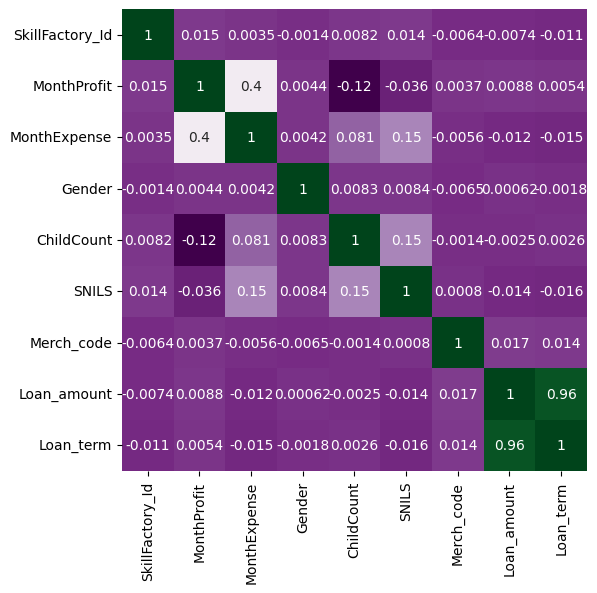

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True, cmap="PRGn", cbar=False);

### 1.2 предполагаемые преобразования, графики распределения значений (датасет без пропусков)

In [ ]:
df.columns

Index(['SkillFactory_Id', 'BirthDate', 'education', 'employment status',
       'Value', 'JobStartDate', 'Position', 'MonthProfit', 'MonthExpense',
       'Gender', 'Family status', 'ChildCount', 'SNILS', 'BankA_decision',
       'BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision',
       'Merch_code', 'Loan_amount', 'Loan_term', 'Goods_category'],
      dtype='object')

In [ ]:
df

,SkillFactory_Id,BirthDate,education,employment status,Value,JobStartDate,Position,MonthProfit,MonthExpense,Gender,...,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Merch_code,Loan_amount,Loan_term,Goods_category
0,1.0,1988-07-21 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,9 - 10 лет,2013-09-01 00:00:00.0000000,начальник п,180000.0,90000.0,0.0,...,0.0,success,success,success,success,denied,77.0,137000.0,18.0,Furniture
1,2.0,1998-01-16 00:00:00.0000000,Высшее - специалист,Собственное дело,1 - 2 года,2022-12-01 00:00:00.0000000,директор,200000.0,60000.0,0.0,...,0.0,success,denied,success,denied,success,27.0,33000.0,6.0,Fitness
2,3.0,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,...,0.0,denied,denied,success,success,success,19.0,165000.0,24.0,Medical_services
3,4.0,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,...,0.0,success,denied,success,success,success,34.0,67000.0,12.0,Education
4,5.0,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,...,0.0,success,denied,success,success,success,75.0,36000.0,6.0,Furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,8780.0,1975-09-07 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2010-06-01 00:00:00.0000000,ГЕНЕРАЛЬНЫЙ ДИРЕКТОР,125000.0,15000.0,1.0,...,0.0,success,success,success,success,success,37.0,7000.0,6.0,Education
6599,8782.0,1985-04-20 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2020-01-01 00:00:00.0000000,УПРАВЛЯЮЩИЙ,150000.0,14000.0,1.0,...,0.0,denied,success,success,success,denied,45.0,20000.0,6.0,Travel
6600,8783.0,1987-12-19 00:00:00.0000000,Высшее - специалист,Собственное дело,10 и более лет,2021-11-01 00:00:00.0000000,МЕНЕДЖЕР ПО ПРОДАЖАМ,130000.0,30000.0,0.0,...,1.0,success,success,success,success,success,22.0,40000.0,6.0,Fitness
6601,8786.0,2003-10-05 00:00:00.0000000,Неоконченное высшее,Работаю по найму полный рабочий день/служу,1 - 2 года,2022-08-01 00:00:00.0000000,продавец,150000.0,10000.0,1.0,...,1.0,success,success,success,success,success,74.0,23000.0,6.0,Furniture


#### 1.2.1 Категориальные столбцы

##### 1.2.1.1 Education(Образование)

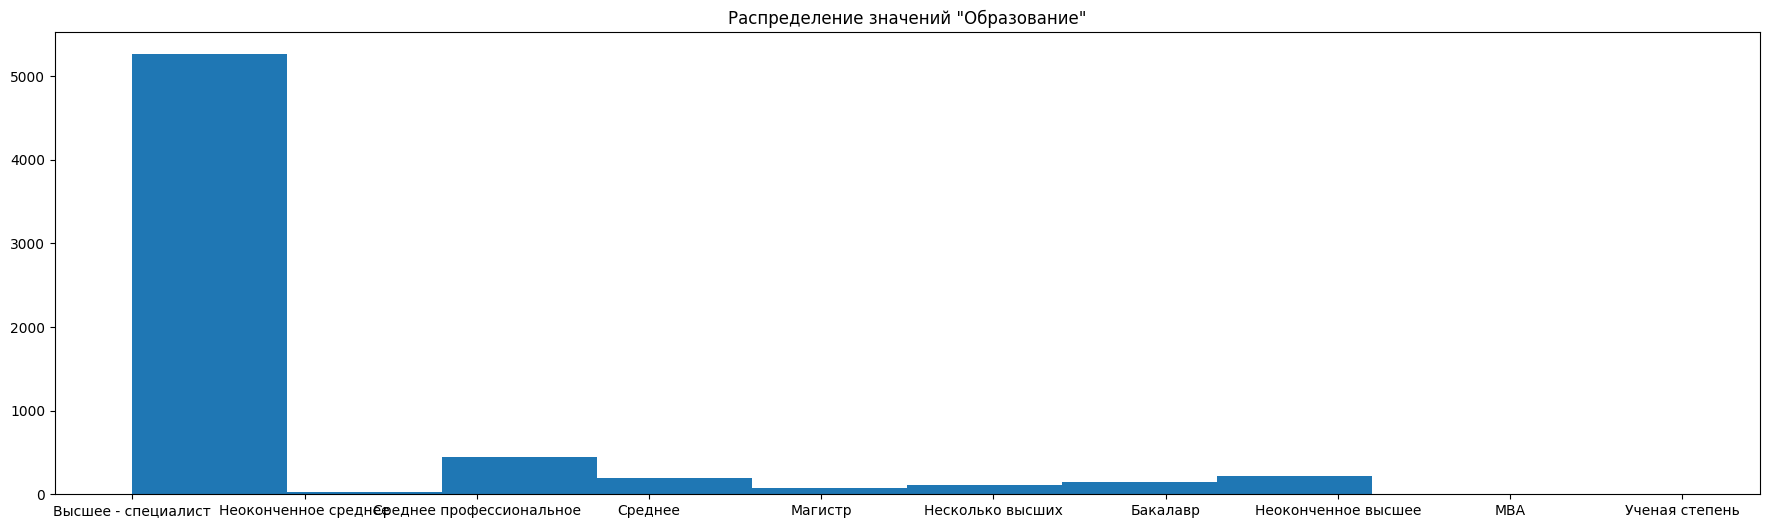

In [ ]:
plt.figure(figsize=(22, 6))
plt.hist(df.education)
plt.title('Распределение значений "Образование"')
plt.show()

In [ ]:
df.education.value_counts().to_frame()

,education
Высшее - специалист,5258
Среднее профессиональное,443
Неоконченное высшее,215
Среднее,194
Бакалавр,144
Несколько высших,109
Магистр,71
Неоконченное среднее,26
MBA,3
Ученая степень,1


In [ ]:
df['BankA_decision']

0       success
1       success
2        denied
3       success
4       success
         ...   
6598    success
6599     denied
6600    success
6601    success
6602     denied
Name: BankA_decision, Length: 6464, dtype: object

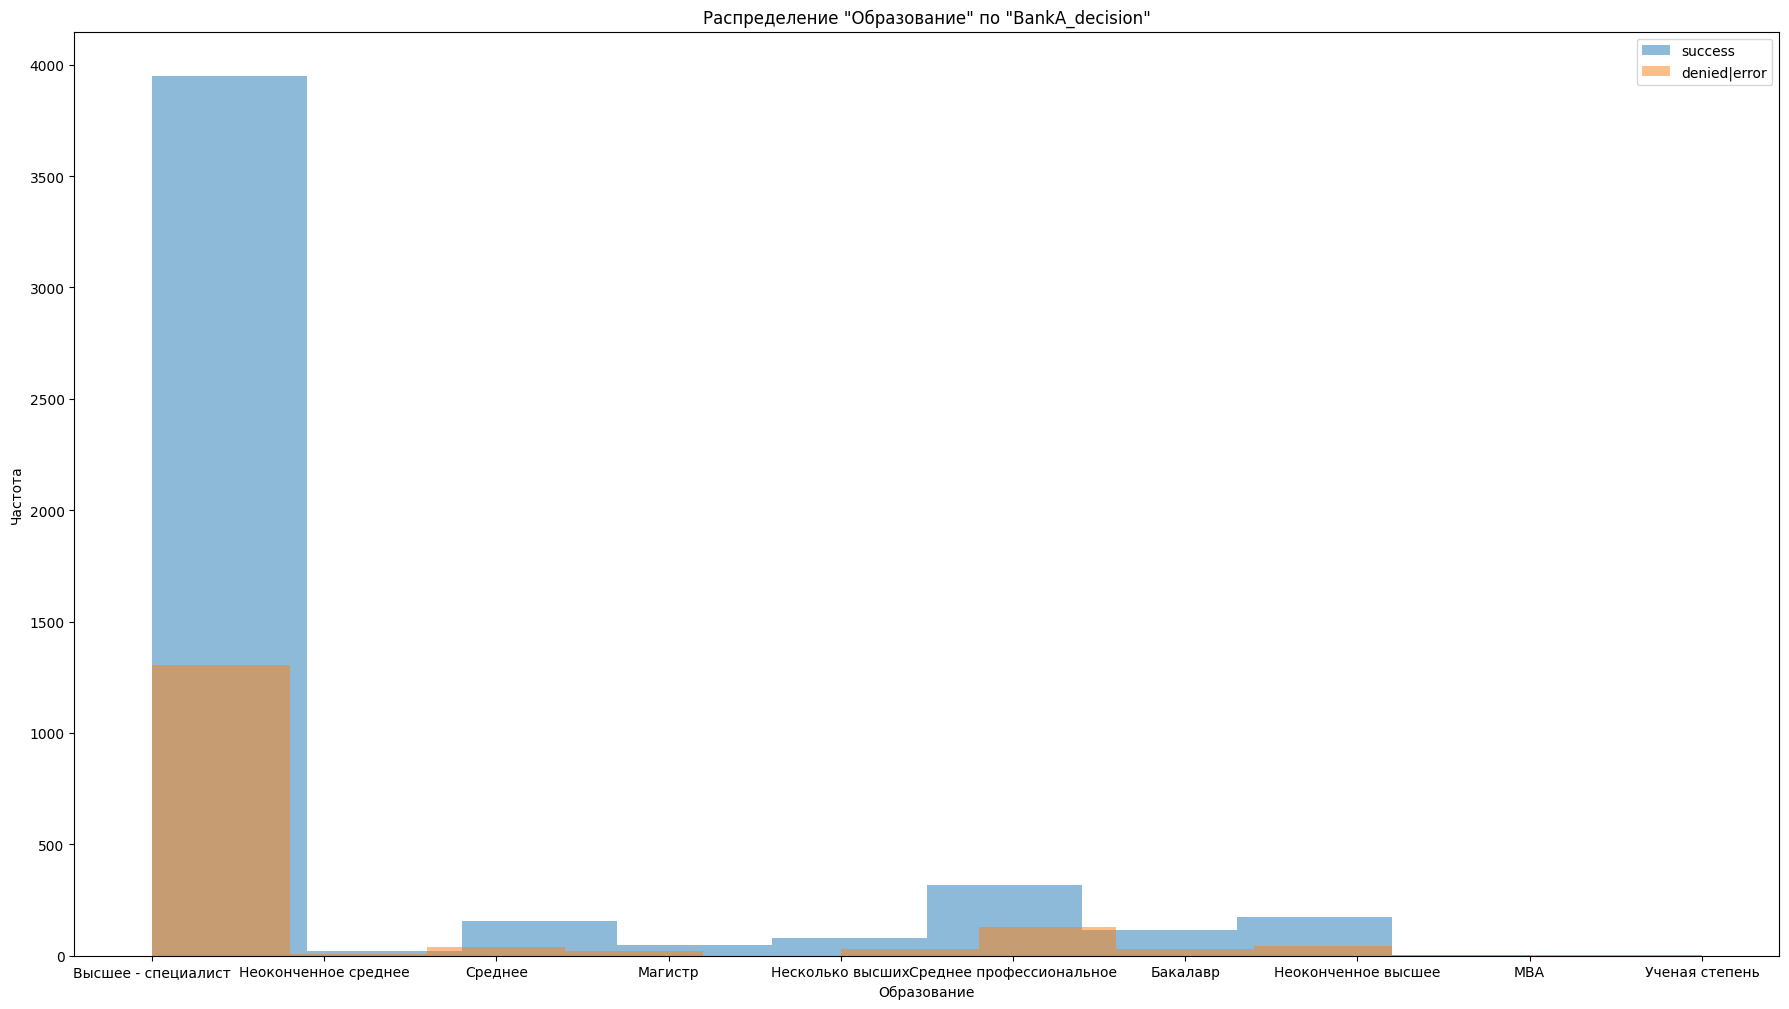

In [ ]:
plt.figure(figsize=(22, 12))
plt.hist(df[df['BankA_decision'] == 'success']['education'], alpha=0.5, label='success')
plt.hist(df[(df['BankA_decision'] == 'denied') |(df['BankA_decision'] == 'error' )]['education'], alpha=0.5, label='denied|error')
plt.title('Распределение "Образование" по "BankA_decision"')
plt.xlabel('Образование')
plt.ylabel('Частота')
plt.legend()
plt.show()

In [ ]:
df['BankA_decision'].value_counts()
#bank_a_decision_counts[0]

success    4860
denied     1535
error        69
Name: BankA_decision, dtype: int64

##### 1.2.1.2 employment status(тип занятости)

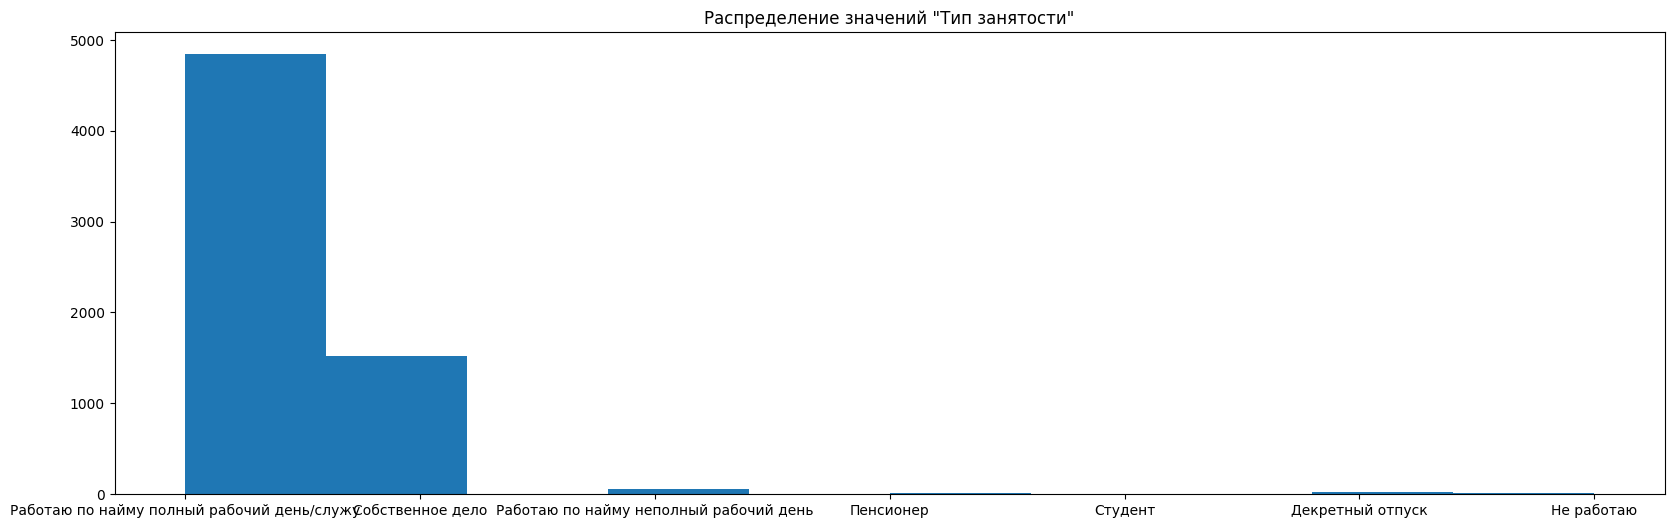

In [ ]:
plt.figure(figsize=(20, 6))
plt.hist(df['employment status'])
plt.title('Распределение значений "Тип занятости"')
plt.show()

In [ ]:
df['employment status'].value_counts().to_frame()

,employment status
Работаю по найму полный рабочий день/служу,4843
Собственное дело,1516
Работаю по найму неполный рабочий день,61
Декретный отпуск,19
Пенсионер,15
Не работаю,8
Студент,2


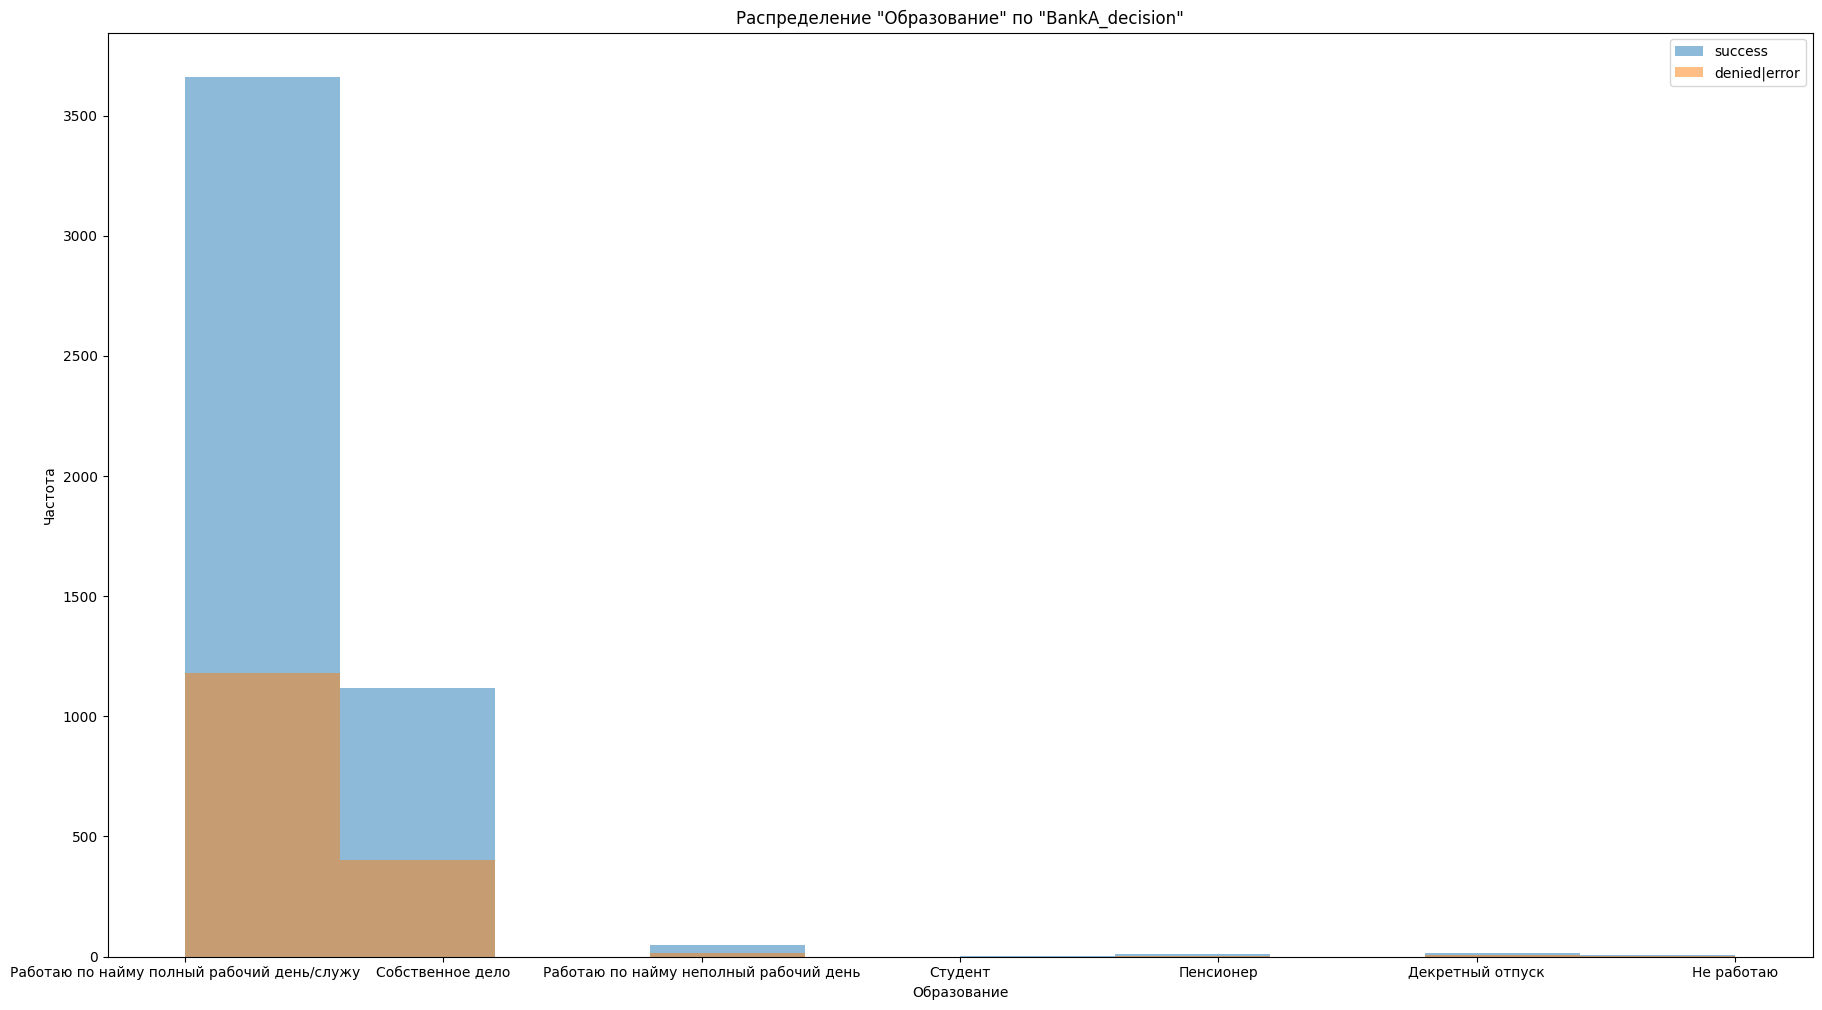

In [ ]:
plt.figure(figsize=(22, 12))
plt.hist(df[df['BankA_decision'] == 'success']['employment status'], alpha=0.5, label='success')
plt.hist(df[(df['BankA_decision'] == 'denied') |(df['BankA_decision'] == 'error' )]['employment status'], alpha=0.5, label='denied|error')
plt.title('Распределение "Образование" по "BankA_decision"')
plt.xlabel('Образование')
plt.ylabel('Частота')
plt.legend()
plt.show()

##### 1.2.1.3 value(стаж работы)

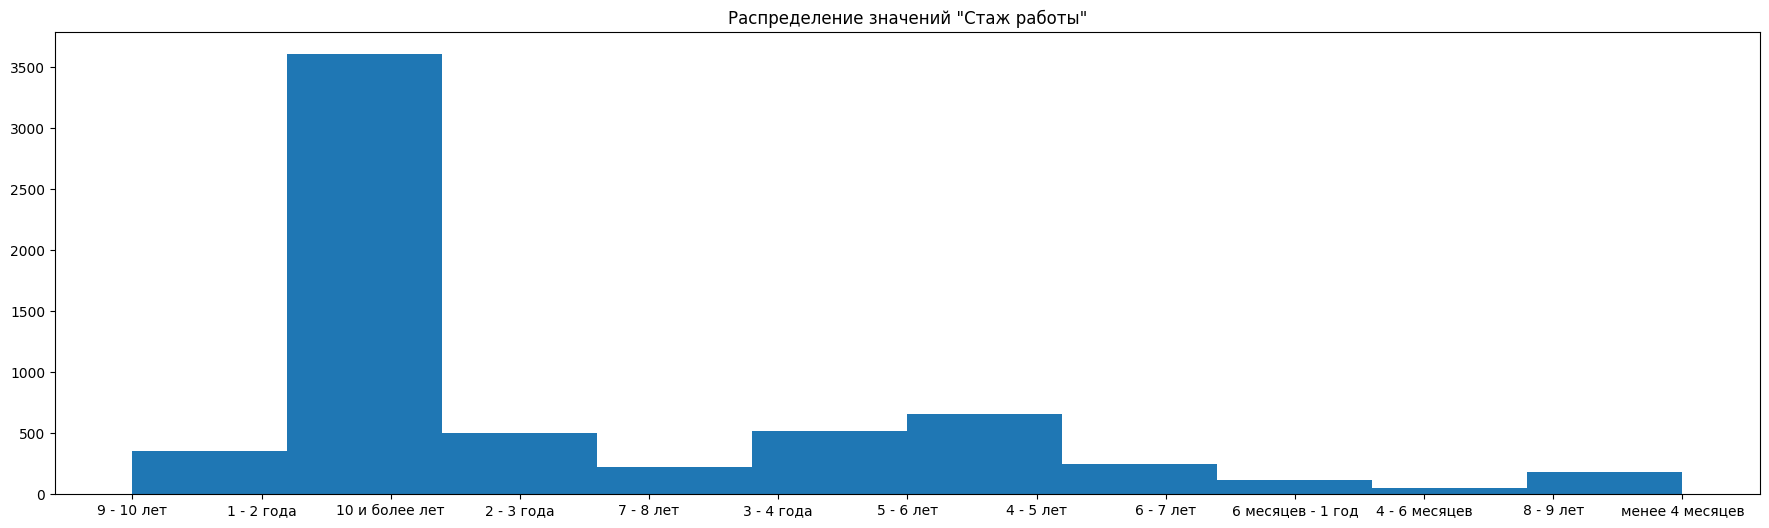

In [ ]:
plt.figure(figsize=(22, 6))
plt.hist(df.Value)
plt.title('Распределение значений "Стаж работы"')
plt.show()

In [ ]:
df.Value.value_counts().to_frame()

,Value
10 и более лет,3605
3 - 4 года,521
2 - 3 года,498
4 - 5 лет,366
5 - 6 лет,289
1 - 2 года,269
6 - 7 лет,250
7 - 8 лет,225
8 - 9 лет,152
6 месяцев - 1 год,118


##### 1.2.1.4 Position(Должность)

In [ ]:
#нерабочий вариант больше 15 минут крутится без толку
#! pip install pyspellchecker
#from spellchecker import SpellChecker
#spell = SpellChecker(language='ru')
# Создаем объект проверки правописания

# Исправляем опечатки в столбце
#df['Position'] = df['Position'].apply(lambda x: spell.correction(x))

In [ ]:
df['Position'] = df['Position'].apply(lambda x: x.lower())
df['Position'] = df['Position'].str.replace(',', '')
df['Position'] = df['Position'].str.rstrip()#удаляем пробелы в конце строки
pd.DataFrame(df.Position.unique())#825 должностей, которые после нормальной обработки сильнее сократятся

,0
0,начальник п
1,директор
2,строитель
3,менеджер
4,самозанятая
...,...
820,медицинский лабораторный техник
821,управля
822,уборщик
823,фотограф


##### 1.2.1.5 Gender(Пол)

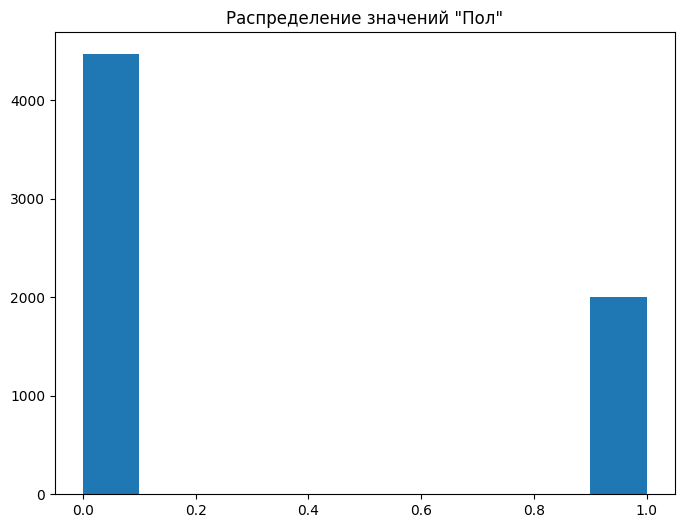

In [ ]:
df.Gender = df.Gender.astype('int8')
plt.figure(figsize=(8, 6))
plt.hist(df.Gender)
plt.title('Распределение значений "Пол"')
plt.show()#женщин в 2 раза меньше обращается за кредитом

##### 1.2.1.6 Family status(Семейный статус)

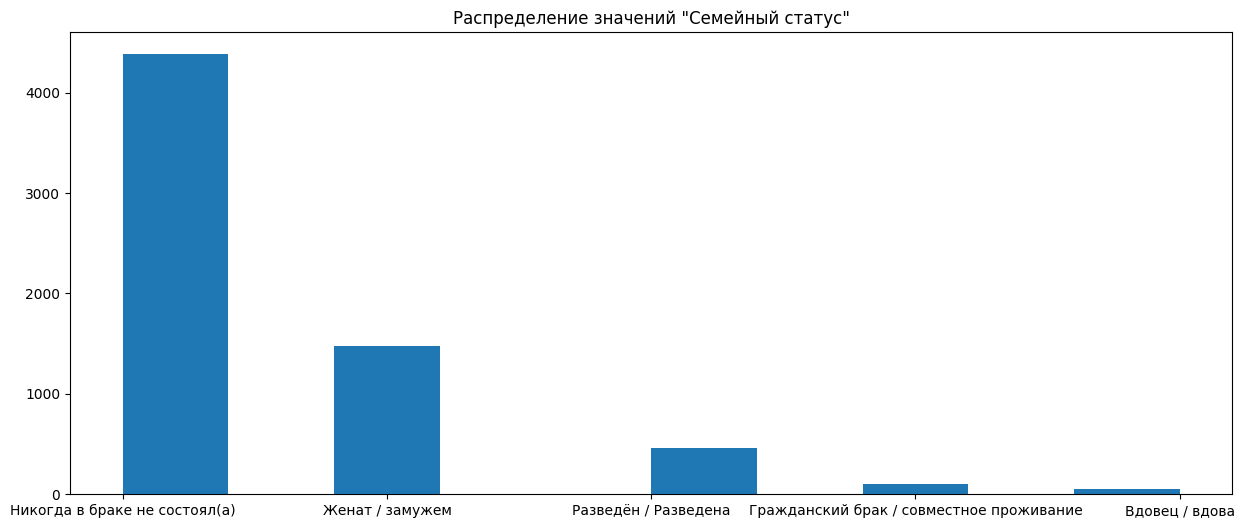

In [ ]:
plt.figure(figsize=(15, 6))
plt.hist(df['Family status'])
plt.title('Распределение значений "Семейный статус"')
plt.show() #гражданский "брак" заменить на сожительство

##### 1.2.1.7 ChildCount(Количество детей младше 18 лет)

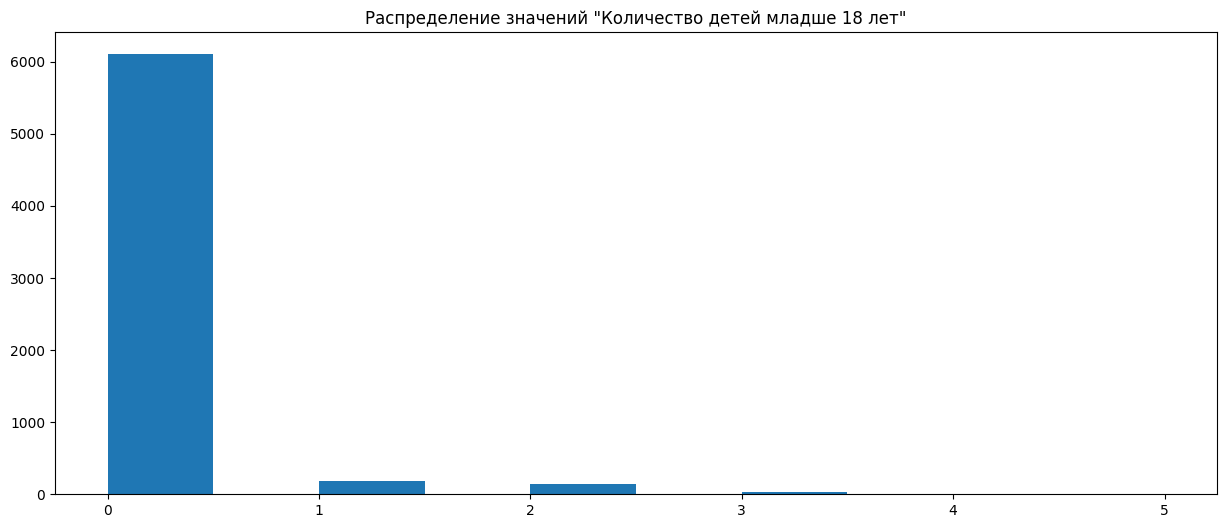

In [ ]:
plt.figure(figsize=(15, 6))
plt.hist(df.ChildCount)
plt.title('Распределение значений "Количество детей младше 18 лет"')
plt.show() #можно сделать категорию есть дети/бездетные #а ещё совместно с семейным статусом сделать родитель одиночка

In [ ]:
df.ChildCount.value_counts().to_frame().T

,0.0,1.0,2.0,3.0,4.0,5.0
ChildCount,6102,186,140,29,6,1


##### 1.2.1.8 SNILS(Наличие СНИЛС)

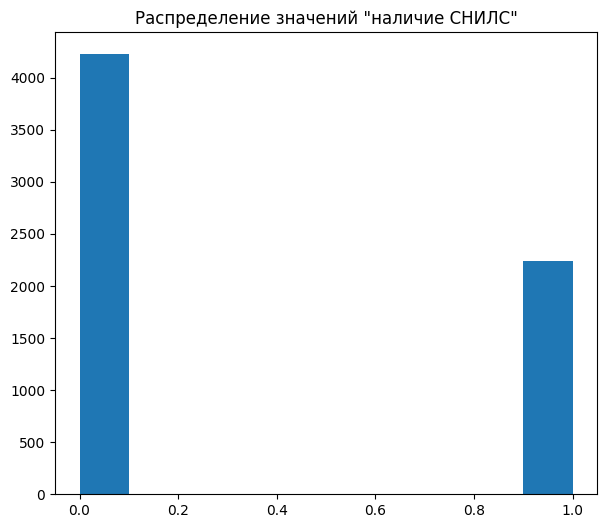

In [ ]:
plt.figure(figsize=(7, 6))
plt.hist(df.SNILS)
plt.title('Распределение значений "наличие СНИЛС"')
plt.show()

##### 1.2.1.9 Merch_code (код магазина)

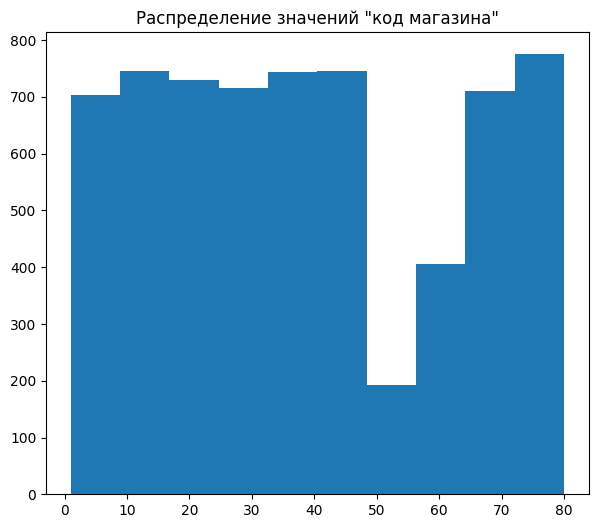

In [ ]:
plt.figure(figsize=(7, 6))
plt.hist(df.Merch_code)
plt.title('Распределение значений "код магазина"')
plt.show() #что есть код магазина? 70 уникальных значений

##### 1.2.1.10 Goods_category Категория товара

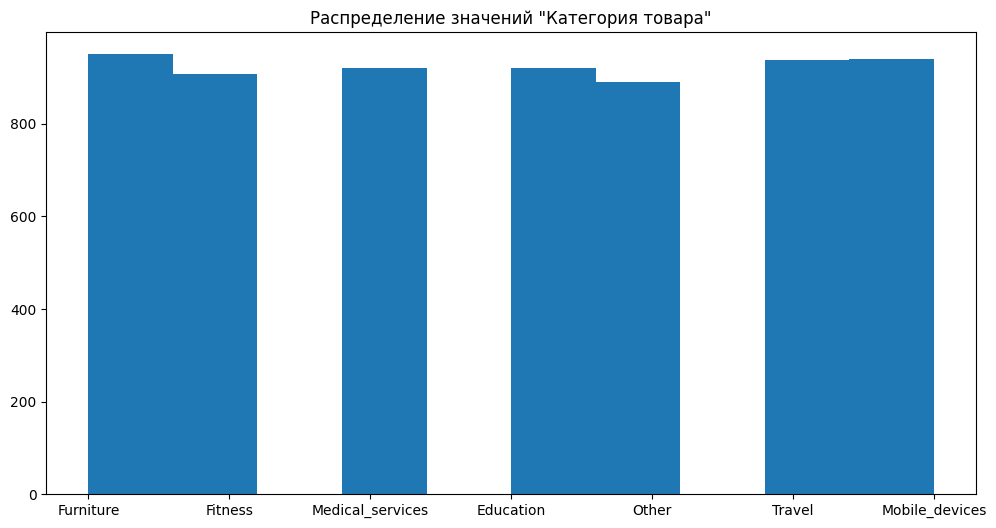

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df.Goods_category)
plt.title('Распределение значений "Категория товара"')
plt.show() #видим равнозначное распределение, тут наверное нечего менять

#### 1.2.2 Числовые столбцы

##### 1.2.2.1 MonthProfit Месячная зарплата

In [ ]:
df.MonthProfit.max() #1млн 200 тысяч в месяц? аномалия?

1200000.0

In [ ]:
df.MonthProfit.min() #чо, аномалия 50 рублей в месяц?

50.0

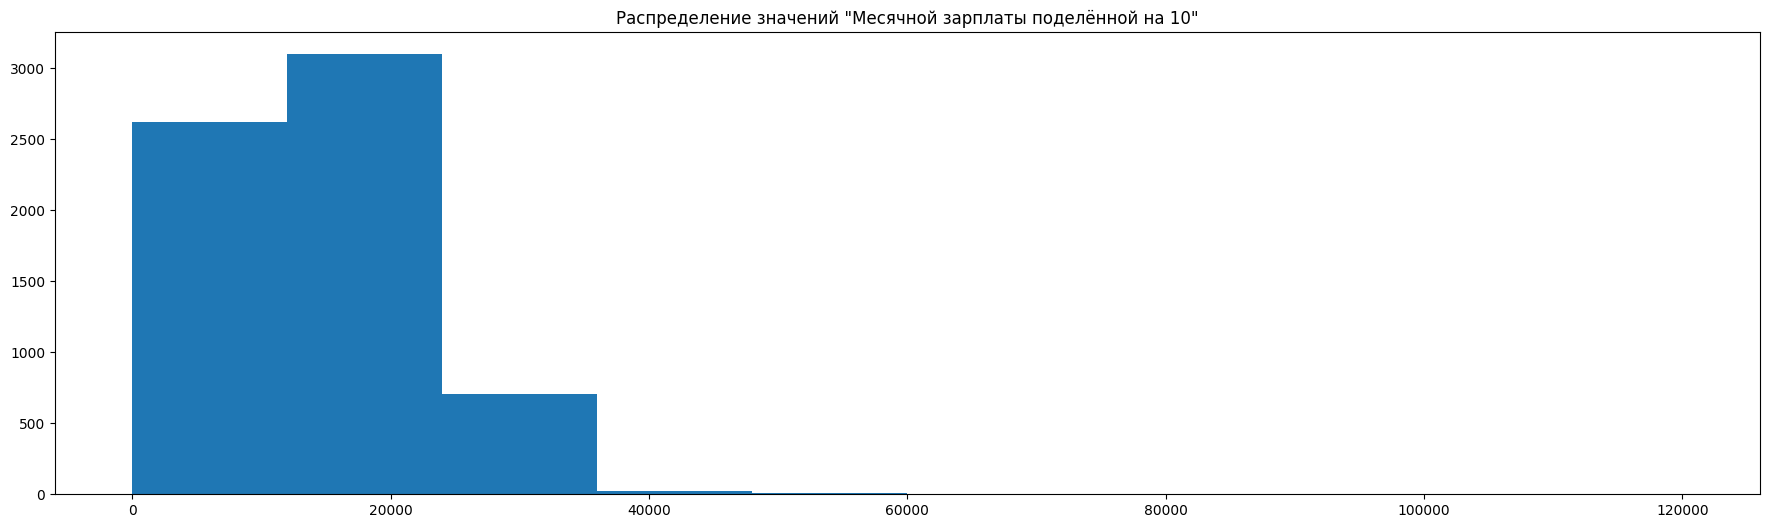

In [ ]:
plt.figure(figsize=(22, 6))
plt.hist(df.MonthProfit/10)#для лучшей читаемости зп на графике просто умножаем на 10
plt.title('Распределение значений "Месячной зарплаты поделённой на 10"')
plt.show()

In [ ]:
df.MonthProfit.value_counts()

150000.0    611
100000.0    603
200000.0    566
120000.0    440
250000.0    330
           ... 
75215.0       1
87600.0       1
87542.0       1
75800.0       1
45675.0       1
Name: MonthProfit, Length: 292, dtype: int64

##### 1.2.2.2 MonthExpense Ежемесячный расход

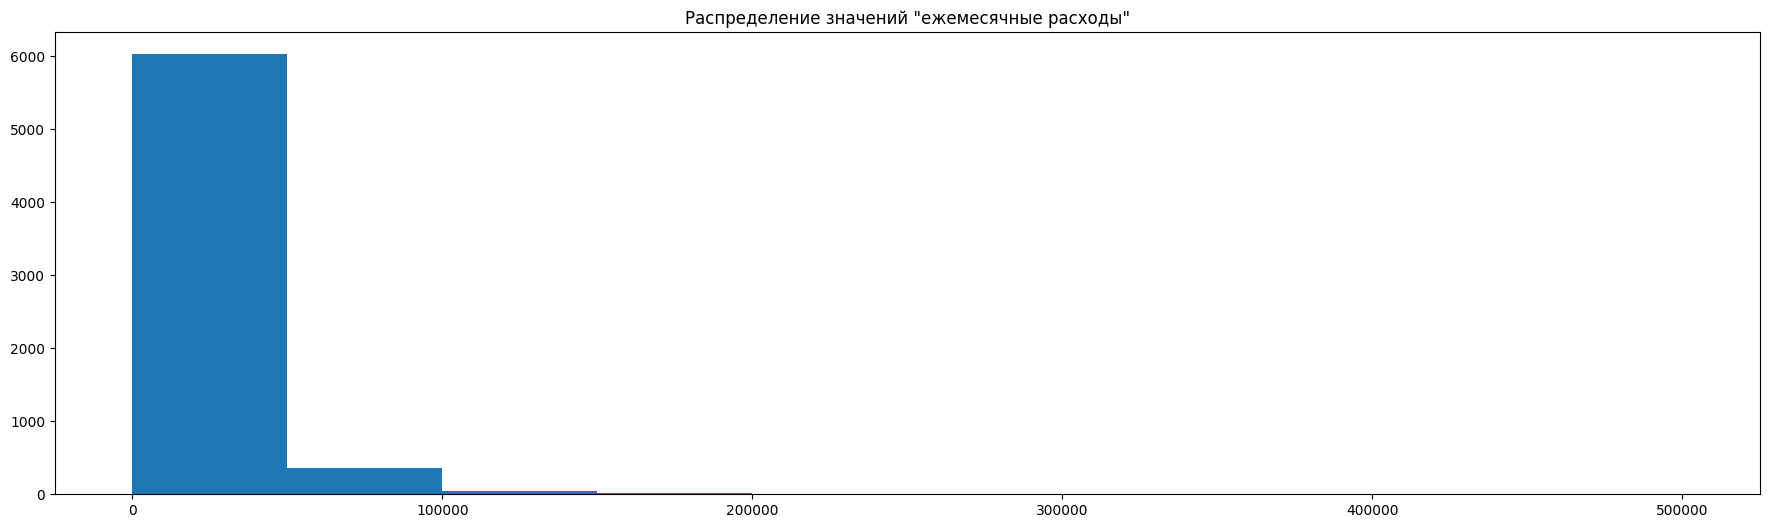

In [ ]:
plt.figure(figsize=(22, 6))
plt.hist(df.MonthExpense)
plt.title('Распределение значений "ежемесячные расходы"')
plt.show()# кто-то тратит 0,5 млн руб?

In [ ]:
df.MonthExpense.value_counts()

30000.0     883
15000.0     603
20000.0     391
40000.0     373
25000.0     331
           ... 
2543.0        1
18750.0       1
13100.0       1
140000.0      1
39780.0       1
Name: MonthExpense, Length: 206, dtype: int64

In [ ]:
df.MonthExpense.min() #нет ежемесячных расходов????

0.0

##### 1.2.2.3 Loan_amount Сумма заказа

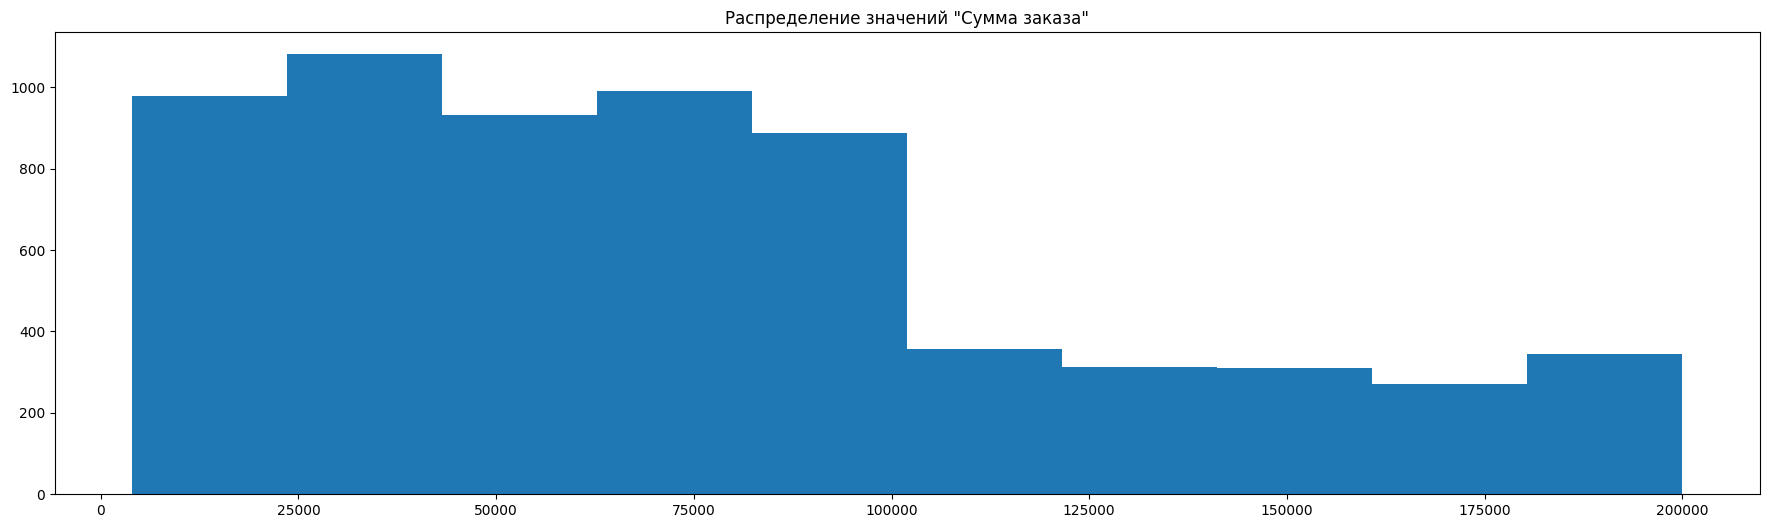

In [ ]:
plt.figure(figsize=(22, 6))
plt.hist(df.Loan_amount)
plt.title('Распределение значений "Сумма заказа"')
plt.show()# не более 200 тыс руб сумма заказа

##### 1.2.2.4 Loan_term Срок кредита

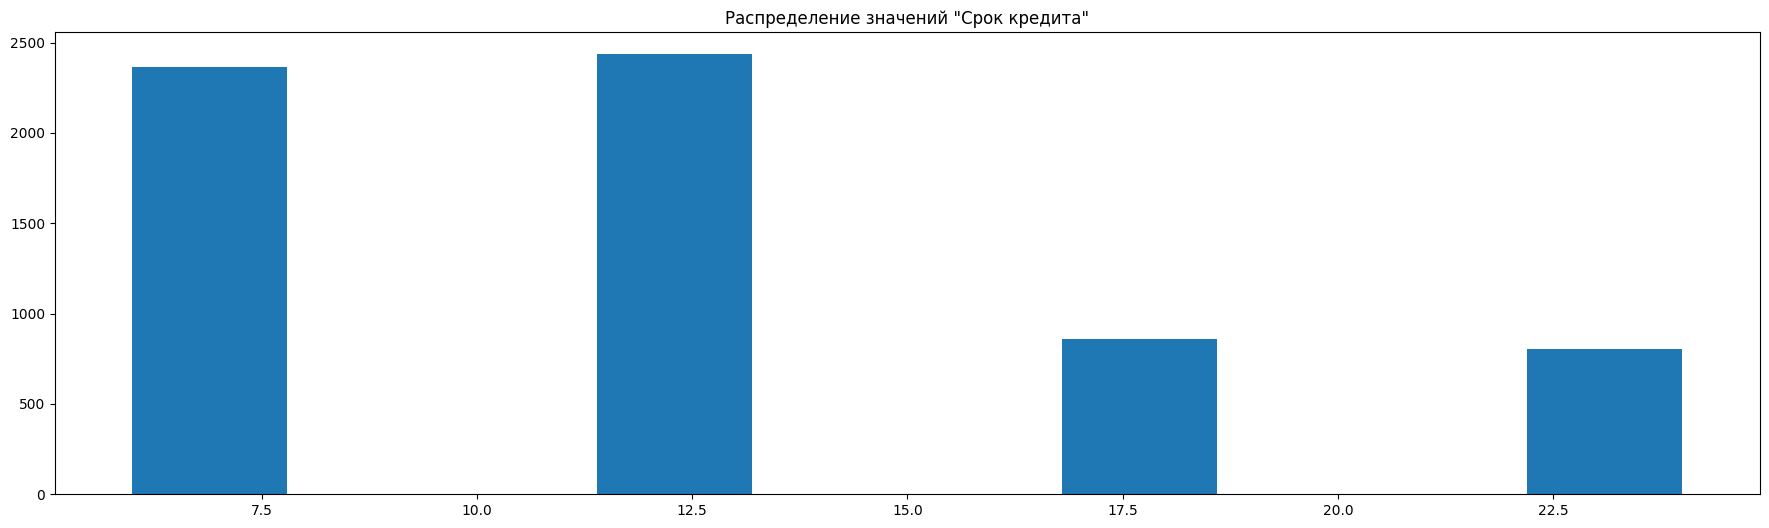

In [ ]:
plt.figure(figsize=(22, 6))
plt.hist(df.Loan_term)
plt.title('Распределение значений "Срок кредита"')
plt.show() # срок кредита не больше двух лет

#### 1.2.3 Дата

##### 1.2.3.1 JobStartDate Дата начала работы (Дата начала работы -> Лет отработал)

In [ ]:
current_date = pd.Timestamp('2023-11-11')
# Преобразуйте строковую дату в Timestamp
df['JobStartDate'] = pd.to_datetime(df['JobStartDate'])
# Преобразуйте возраст для каждой даты в датасете
df['work_age'] = ((current_date - df['JobStartDate']).dt.days / 365.25).round(1)

In [ ]:
df.work_age.min(), df.work_age.max() #количество проработанных лет

(0.4, 50.2)

##### 1.2.3.2 BirthDate Дата рождения (Дата рождения -> возраст)

In [ ]:
df.BirthDate

0       1988-07-21 00:00:00.0000000
1       1998-01-16 00:00:00.0000000
2       1972-10-02 00:00:00.0000000
3       1972-10-02 00:00:00.0000000
4       1972-10-02 00:00:00.0000000
                   ...             
6598    1975-09-07 00:00:00.0000000
6599    1985-04-20 00:00:00.0000000
6600    1987-12-19 00:00:00.0000000
6601    2003-10-05 00:00:00.0000000
6602    2003-10-05 00:00:00.0000000
Name: BirthDate, Length: 6464, dtype: object

In [ ]:
current_date = pd.Timestamp('2023-11-11')
# Преобразуйте строковую дату в Timestamp
df['BirthDate'] = pd.to_datetime(df['BirthDate'])
# Преобразуйте возраст для каждой даты в датасете
df['age'] = ((current_date - df['BirthDate']).dt.days / 365.25).round(1)

In [ ]:
df.age.max(), df.age.min() #запросы совершались в 2023 году?

(83.6, 18.5)

#### 1.2.4 Целевая метка (Решение банков)
тут модно бернуть в вероятность:  
все откажут - 0  
все согласятся - 1  
согласятся 4 банка 0.8  
согласится один банк - 0.2 и т.п.

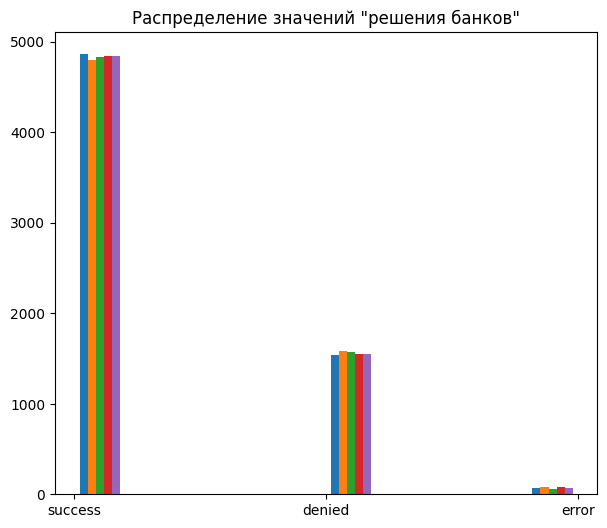

In [ ]:
bank_list = ['BankA_decision', 'BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision']

plt.figure(figsize=(7, 6))
plt.hist(df[bank_list])
plt.title('Распределение значений "решения банков"')
plt.show()#; строки с error отбрасываем? #МОЖНО СДЕЛАТЬ

In [ ]:
df[bank_list][df[bank_list] == 'success']

,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision
0,success,success,success,success,NaN
1,success,NaN,success,NaN,success
2,NaN,NaN,success,success,success
3,success,NaN,success,success,success
4,success,NaN,success,success,success
...,...,...,...,...,...
6598,success,success,success,success,success
6599,NaN,success,success,success,NaN
6600,success,success,success,success,success
6601,success,success,success,success,success


In [ ]:
for element in bank_list:#кодирую новые 5 столбцов для получения информация об error
  df[element+'_error'] = df[element].map({'error': 1,'success': 0,'denied': 0})
  #print(element+'_')

In [ ]:
bank_list_error = ['BankA_decision_error', 'BankB_decision_error', 'BankC_decision_error', 'BankD_decision_error', 'BankE_decision_error']

In [ ]:
for element in bank_list_error:
  print(element,df[element].sum())# количество ошибок от банков

BankA_decision_error 69
BankB_decision_error 75
BankC_decision_error 60
BankD_decision_error 75
BankE_decision_error 70


In [ ]:
for element in bank_list:#кодирую новые 5 столбцов для получения информация об error
  df[element+'_success'] = df[element].map({'error': 0,'success': 1,'denied': 0})

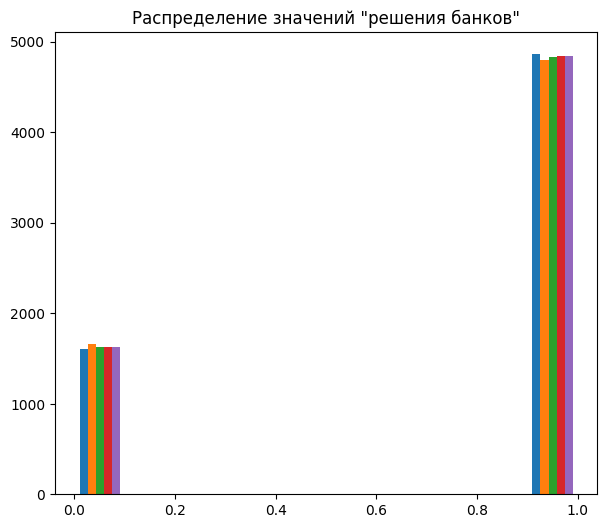

In [ ]:
bank_list_success = ['BankA_decision_success', 'BankB_decision_success', 'BankC_decision_success', 'BankD_decision_success', 'BankE_decision_success']

plt.figure(figsize=(7, 6))
plt.hist(df[bank_list_success])
plt.title('Распределение значений "решения банков"')
plt.show()#;

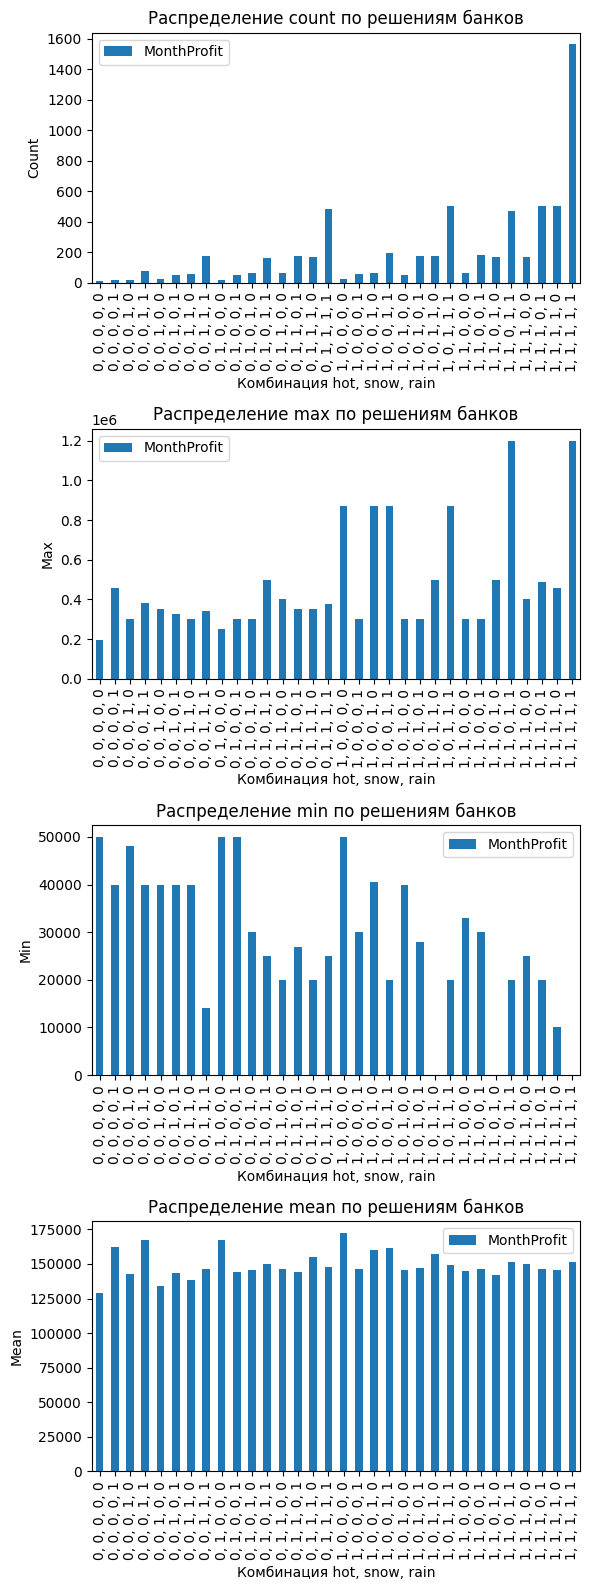

In [ ]:
# Список агрегатных функций
aggregate_functions = [ 'count', 'max', 'min', 'mean']
# Создаем фигуры и оси графиков
fig, axes = plt.subplots(len(aggregate_functions), 1, figsize=(6, 4*len(aggregate_functions)))
# Цикл по агрегатным функциям
for i, agg_func in enumerate(aggregate_functions):
    # Создаем сводную таблицу с текущей агрегатной функцией
    pivot_table = df.pivot_table(values='MonthProfit', index=['BankA_decision_success', 'BankB_decision_success', 'BankC_decision_success', 'BankD_decision_success', 'BankE_decision_success'], aggfunc=agg_func).reset_index()
    # Объединяем значения столбцев в одну строку
    pivot_table['bank'] = pivot_table[['BankA_decision_success', 'BankB_decision_success', 'BankC_decision_success', 'BankD_decision_success', 'BankE_decision_success']].apply(lambda x: ', '.join(map(str, x)), axis=1)
    # Создаем график для текущей агрегатной функции
    ax = axes[i]
    pivot_table.plot(x='bank', y='MonthProfit', kind='bar', ax=ax)
    # Настройка осей и заголовка графика
    ax.set_xlabel('Комбинация hot, snow, rain')
    ax.set_ylabel(agg_func.capitalize())  # Первая буква заглавная
    ax.set_title(f'Распределение {agg_func} по решениям банков')
# Размещение графиков на фигуре
plt.tight_layout()
plt.show()

In [ ]:
education_categories = df['education'].unique()
total_counts = len(df)
for element in bank_list:
    for education_category in education_categories:
        print(f"Education Category: {education_category}")
        education_subset = df[df['education'] == education_category]
        bank_counts = education_subset[element].value_counts(normalize=True) * 100

        for decision, percentage in bank_counts.items():
            print(f" {element}={decision}: {percentage:.2f}%")

        print()

Education Category: Высшее - специалист
 BankA_decision=success: 75.14%
 BankA_decision=denied: 23.81%
 BankA_decision=error: 1.05%

Education Category: Неоконченное среднее
 BankA_decision=success: 76.92%
 BankA_decision=denied: 19.23%
 BankA_decision=error: 3.85%

Education Category: Среднее профессиональное
 BankA_decision=success: 71.11%
 BankA_decision=denied: 27.09%
 BankA_decision=error: 1.81%

Education Category: Среднее
 BankA_decision=success: 80.41%
 BankA_decision=denied: 19.07%
 BankA_decision=error: 0.52%

Education Category: Магистр
 BankA_decision=success: 67.61%
 BankA_decision=denied: 30.99%
 BankA_decision=error: 1.41%

Education Category: Несколько высших
 BankA_decision=success: 73.39%
 BankA_decision=denied: 26.61%

Education Category: Бакалавр
 BankA_decision=success: 79.86%
 BankA_decision=denied: 18.75%
 BankA_decision=error: 1.39%

Education Category: Неоконченное высшее
 BankA_decision=success: 80.00%
 BankA_decision=denied: 19.53%
 BankA_decision=error: 0.47

In [ ]:
df.columns

Index(['SkillFactory_Id', 'BirthDate', 'education', 'employment status',
       'Value', 'JobStartDate', 'Position', 'MonthProfit', 'MonthExpense',
       'Gender', 'Family status', 'ChildCount', 'SNILS', 'BankA_decision',
       'BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision',
       'Merch_code', 'Loan_amount', 'Loan_term', 'Goods_category', 'work_age',
       'age', 'BankA_decision_error', 'BankB_decision_error',
       'BankC_decision_error', 'BankD_decision_error', 'BankE_decision_error',
       'BankA_decision_success', 'BankB_decision_success',
       'BankC_decision_success', 'BankD_decision_success',
       'BankE_decision_success'],
      dtype='object')

In [ ]:
#по всему датасету, но надо придумать как нормально это просматривать
dfColumns = ['education', 'employment status',
       'Value',
       'Gender', 'Family status', 'ChildCount', 'SNILS',
       'Merch_code', 'Loan_amount', 'Loan_term', 'Goods_category']
for datasetElement in dfColumns:
  categories = df[datasetElement].unique()
  for element in bank_list:
    for category in categories:
        print(f"{datasetElement}: {category}")
        subset = df[df[datasetElement] == category]
        bank_counts = subset[element].value_counts(normalize=True) * 100
        for decision, percentage in bank_counts.items():
            print(f" {element}={decision}: {percentage:.2f}%")

        print()

Выходные данные были обрезаны до нескольких последних строк (5000).
Merch_code: 70.0
 BankD_decision=success: 74.12%
 BankD_decision=denied: 23.53%
 BankD_decision=error: 2.35%

Merch_code: 29.0
 BankD_decision=success: 76.09%
 BankD_decision=denied: 22.83%
 BankD_decision=error: 1.09%

Merch_code: 6.0
 BankD_decision=success: 83.54%
 BankD_decision=denied: 16.46%

Merch_code: 28.0
 BankD_decision=success: 87.36%
 BankD_decision=denied: 12.64%

Merch_code: 24.0
 BankD_decision=success: 82.61%
 BankD_decision=denied: 15.22%
 BankD_decision=error: 2.17%

Merch_code: 38.0
 BankD_decision=success: 80.43%
 BankD_decision=denied: 17.39%
 BankD_decision=error: 2.17%

Merch_code: 63.0
 BankD_decision=success: 79.61%
 BankD_decision=denied: 19.42%
 BankD_decision=error: 0.97%

Merch_code: 44.0
 BankD_decision=success: 77.78%
 BankD_decision=denied: 22.22%

Merch_code: 32.0
 BankD_decision=success: 74.16%
 BankD_decision=denied: 25.84%

Merch_code: 10.0
 BankD_decision=success: 72.00%
 BankD_dec

In [ ]:
result_data = {'datasetElement': [], 'category': [], 'element_decision': [], 'percentage': []}

for datasetElement in dfColumns:
    categories = df[datasetElement].unique()
    for element in bank_list:
        for category in categories:
            subset = df[df[datasetElement] == category]
            bank_counts = subset[element].value_counts(normalize=True) * 100
            for decision, percentage in bank_counts.items():
                result_data['datasetElement'].append(datasetElement)
                result_data['category'].append(category)
                result_data['element_decision'].append(f"{element}={decision}")
                result_data['percentage'].append(percentage)

result_df = pd.DataFrame(result_data)

In [ ]:

result_df

,datasetElement,category,element_decision,percentage
0,education,Высшее - специалист,BankA_decision=success,75.142640
1,education,Высшее - специалист,BankA_decision=denied,23.811335
2,education,Высшее - специалист,BankA_decision=error,1.046025
3,education,Неоконченное среднее,BankA_decision=success,76.923077
4,education,Неоконченное среднее,BankA_decision=denied,19.230769
...,...,...,...,...
3902,Goods_category,Travel,BankE_decision=denied,21.024546
3903,Goods_category,Travel,BankE_decision=error,1.280683
3904,Goods_category,Mobile_devices,BankE_decision=success,72.978723
3905,Goods_category,Mobile_devices,BankE_decision=denied,26.170213


#### 1.2.5 Выводы /пометки для датасета без пропусков

**SkillFactory_Id** в int  
**BirthDate** в age (если все события произошли хотя бы в течении полугода)  
education явно придётся категории объединять и сокращать название переменных  
**Value** возможно придётся объединять категории (перевод в числовую переменную с нормализацией?)  
**Position** может откинуть его?, у нас же есть уровень дохода, в любом случае на него нужно потратить много времени(устранения опечаток, слияние двух профессий написанных по разному(скоращения, женский и мужской вариант)) прежде чем мы сможем использовать столбец по назначению
****

**MounthProfit и MonthExpense** требуют очистки от аномалий

2. Поиск аномалий

### датасет с пропущенными строками

In [ ]:
df_drop.isna().sum()

SkillFactory_Id        0
BirthDate              0
education              0
employment status      0
Value                 80
JobStartDate         109
Position             109
MonthProfit            0
MonthExpense           0
Gender                37
Family status         37
ChildCount            37
SNILS                  0
BankA_decision         0
BankB_decision         0
BankC_decision         0
BankD_decision         0
BankE_decision         0
Merch_code             0
Loan_amount            0
Loan_term              0
Goods_category         0
dtype: int64

In [ ]:
z = df_drop[(df_drop['JobStartDate'].isna() ==True) | df_drop['Gender'].isna() ==True]

In [ ]:
z.isna().sum()

SkillFactory_Id        0
BirthDate              0
education              0
employment status      0
Value                 80
JobStartDate         109
Position             109
MonthProfit            0
MonthExpense           0
Gender                37
Family status         37
ChildCount            37
SNILS                  0
BankA_decision         0
BankB_decision         0
BankC_decision         0
BankD_decision         0
BankE_decision         0
Merch_code             0
Loan_amount            0
Loan_term              0
Goods_category         0
dtype: int64

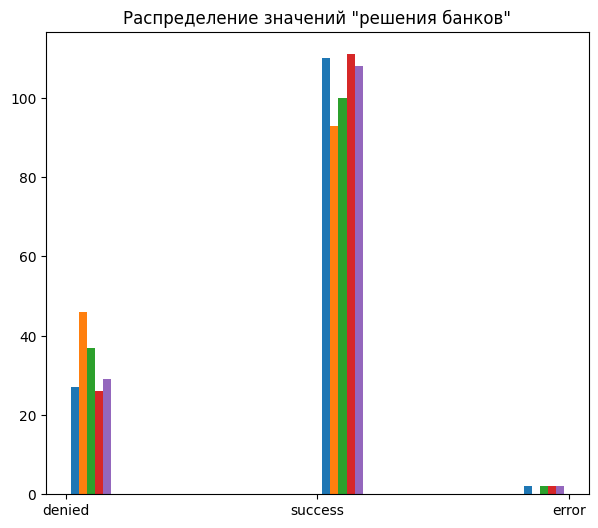

In [ ]:
bank_list = ['BankA_decision', 'BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision']

plt.figure(figsize=(7, 6))
plt.hist(z[bank_list])
plt.title('Распределение значений "решения банков"')
plt.show()#; строки с error отбрасываем? #МОЖНО СДЕЛАТЬ

## 3 . Предобработка (датасет без пропусков)

In [ ]:
df = pd.read_csv('/content/SF_Mandarin_dataset_ver3_csv.csv?rlkey=jkngphmwkoocingpxoga0uv2v',sep=';')
df.dropna(inplace=True) #пока удаляю все пропуски

In [ ]:
#преобразование дат
current_date = pd.Timestamp('2023-11-11')
df['JobStartDate'] = pd.to_datetime(df['JobStartDate'])
df['work_age'] = ((current_date - df['JobStartDate']).dt.days / 365.25).round(1)
df['BirthDate'] = pd.to_datetime(df['BirthDate'])
df['age'] = ((current_date - df['BirthDate']).dt.days / 365.25).round(1)
df.drop(['JobStartDate', 'BirthDate'], axis=1, inplace=True)

In [ ]:
df.MonthProfit = df.MonthProfit.astype('int64')
df.MonthExpense = df.MonthExpense.astype('int64')
df.Loan_amount = df.Loan_amount.astype('int64')

In [ ]:
#новый признак числовой
#df['remnant'] = df['MonthProfit'] - ['MonthExpense'] UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U12')) -> None
#df['age_correlation'] = df.age / df.work_age # не улучшает, но может с незначительным понижением score (1 сотая) заменить два столбца
#df['cash_correlation'] = df.MonthProfit / df.MonthExpense #можно удалит эти признаки и, но score повысится на 1 сотую
#df['loan_correlation'] = df.Loan_amount / df.Loan_term #влияние не имеет
df['debt_correlation'] = (df.MonthProfit - df.MonthExpense) /  df.Loan_amount

In [ ]:
#новый признак категориальный
#df.ChildCount = df.ChildCount.map({0.0: 0, 1.0: 1, 2.0: 1, 3.0: 1, 4.0:1, 5.0:1 }) #нету повышения, но без этого признака на 1 сотую меньше

In [ ]:
#score не повышает, но категории уменьшает (временно исключаю, sсщку не понижает)
#df['Position'] = df['Position'].apply(lambda x: x.lower())
#df['Position'] = df['Position'].str.replace(',', '')
#df['Position'] = df['Position'].str.rstrip()#удаляем пробелы в конце строки

In [ ]:
#удаляем всё кроме банка А
df.drop(['BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision'], axis=1, inplace=True)
df['BankA_decision'] = df['BankA_decision'].map({'error': 0,'success': 1,'denied': 0})

In [ ]:
df.dropna(inplace=True)
X = df.drop(['BankA_decision','SkillFactory_Id','Position','MonthProfit','MonthExpense'],axis=1)
#X = df['SkillFactory_Id']
y = df['BankA_decision']
X = pd.get_dummies(X)

## 4. Задача классфикации

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,  test_size=0.2,random_state=0)

In [ ]:
сatClmodel = CatBoostClassifier(verbose=100,random_seed=2)

In [ ]:
сatClmodel.fit(X_train, y_train)

Learning rate set to 0.020779
0:	learn: 0.6873910	total: 3.05ms	remaining: 3.05s
100:	learn: 0.5514073	total: 293ms	remaining: 2.6s
200:	learn: 0.5343805	total: 1.02s	remaining: 4.04s
300:	learn: 0.5207395	total: 1.49s	remaining: 3.46s
400:	learn: 0.5074938	total: 2.26s	remaining: 3.38s
500:	learn: 0.4934860	total: 2.93s	remaining: 2.92s
600:	learn: 0.4794379	total: 3.5s	remaining: 2.33s
700:	learn: 0.4654941	total: 4.21s	remaining: 1.8s
800:	learn: 0.4532368	total: 4.93s	remaining: 1.23s
900:	learn: 0.4420520	total: 5.65s	remaining: 621ms
999:	learn: 0.4310485	total: 6.11s	remaining: 0us


In [ ]:
X_train

,Gender,ChildCount,SNILS,Merch_code,Loan_amount,Loan_term,work_age,age,cash_correlation,loan_correlation,...,Family status_Женат / замужем,Family status_Никогда в браке не состоял(а),Family status_Разведён / Разведена,Goods_category_Education,Goods_category_Fitness,Goods_category_Furniture,Goods_category_Medical_services,Goods_category_Mobile_devices,Goods_category_Other,Goods_category_Travel
6100,0.0,0.0,1.0,48.0,122000.0,18.0,2.1,21.1,9.269231,6777.777778,...,0,1,0,0,0,0,0,0,0,1
5471,0.0,0.0,0.0,9.0,54000.0,12.0,13.9,47.5,16.000000,4500.000000,...,0,1,0,0,0,0,0,0,1,0
5961,1.0,0.0,0.0,35.0,131000.0,18.0,8.0,34.3,4.500000,7277.777778,...,0,0,1,1,0,0,0,0,0,0
5607,0.0,0.0,0.0,31.0,17000.0,6.0,3.9,29.6,15.000000,2833.333333,...,0,1,0,1,0,0,0,0,0,0
178,0.0,0.0,1.0,17.0,66000.0,12.0,18.3,47.2,6.666667,5500.000000,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,1.0,2.0,1.0,80.0,81000.0,12.0,0.8,43.1,5.000000,6750.000000,...,0,1,0,0,0,1,0,0,0,0
3319,0.0,0.0,1.0,67.0,182000.0,24.0,10.1,32.8,6.666667,7583.333333,...,0,1,0,0,0,0,0,1,0,0
1677,0.0,0.0,0.0,33.0,79000.0,12.0,11.4,34.6,9.855072,6583.333333,...,0,1,0,1,0,0,0,0,0,0
2650,0.0,0.0,0.0,35.0,138000.0,18.0,5.4,39.8,4.333333,7666.666667,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
predict = сatClmodel.predict(X_val)
f1_score(predict, y_val)

0.8630559225011007

In [ ]:
сatClmodel.get_feature_importance(prettified=True).head(50)

,Feature Id,Importances
0,Loan_amount,15.657094
1,work_age,12.705960
2,Merch_code,12.433481
3,age,12.320442
4,cash_correlation,11.925111
5,Loan_term,2.919222
6,Gender,2.863774
7,SNILS,2.003588
8,Value_2 - 3 года,1.647522
9,Goods_category_Fitness,1.586949


# Вопросы


"ML- модель которая сможет подсказывать заранее вероятность получения кредита клиентом в конкретных банках, для повышения конверсии бизнеса."
а где у нас собственно целевая метрика? какой столбец? самим рассчитать вероятность?


Все события из строк произошли в один период? например в течении полугода

что такое JobStartDate дата началы пьоследнего места работы

поделитесь как вы обрабатываете Posititon

что происходит после error от банка?
error это ошибка техническая или ошибка, что не всех данных достаточно

что есть код магазина? зашифрованный магазин для которого берётся кредит?
других кредитов тут нет?

Ежемесячный доход;MonthProfit; это на 1 человека или на всех членов семьи

Кто обращается к вам заявитель или представитель магазина. В этом датасете мы имеем дело только с рассрочкой?

В каком году совершались запросы? 2023? нужно для вычисления возраста на момент запроса

Нужно ли делать ТЗ?